# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [293]:
# import libraries
import pandas as pd
import requests
import json
import csv
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [294]:
# read csv file to dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv', skipinitialspace=True, error_bad_lines=False, encoding='utf8', skip_blank_lines=True)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [295]:
# Use requests library to download tsv file
CSV_URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter='\t')
    cols = next(cr)
    rows = list(cr)
    df_predict = pd.DataFrame(rows,columns=cols)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [296]:
rows = []
with open("tweet-json.txt", "r") as txt_file:
  for row in txt_file.readlines():
    data = json.loads(row)
    followers_count = None
    if data['user']:
        data['followers_count'] = data['user']['followers_count']
        
        
    rows.append(data)

df_tweet = pd.DataFrame(rows)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Archive Dataset 

In [297]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [298]:
# check source values
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [299]:
# check text values
df_archive.text[:5].tolist()

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f']

In [300]:
# check duplicate tweet id
df_archive.tweet_id.value_counts()[:5]

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
Name: tweet_id, dtype: int64

In [301]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Lola           10
Penny          10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
an              7
Daisy           7
Buddy           7
Toby            7
Jack            6
Scout           6
Rusty           6
Dave            6
Oscar           6
Stanley         6
Jax             6
Bella           6
Milo            6
Leo             6
Koda            6
Alfie           5
             ... 
Tycho           1
Ronnie          1
Snoopy          1
Stephanus       1
Iggy            1
Jockson         1
officially      1
Laika           1
Spark           1
Gabby           1
Cheryl          1
Buckley         1
Bones           1
Tayzie          1
Beckham         1
Mo              1
Kobe            1
Lupe            1
Tupawc          1
Ben             1
Todo            1
Monty           1
Tilly           1
Joshwa          1
Dante     

In [302]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [303]:
df_archive[df_archive.rating_numerator == 1776][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10


In [304]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [305]:
# check combine data of 4 columns.
df_archive[['doggo','floofer','pupper','puppo']].drop_duplicates()

,doggo,floofer,pupper,puppo
0,None,None,None,None
9,doggo,None,None,None
12,None,None,None,puppo
29,None,None,pupper,None
46,None,floofer,None,None
191,doggo,None,None,puppo
200,doggo,floofer,None,None
460,doggo,None,pupper,None


### Image Prediction Dataset

In [306]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null object
p3_dog      2075 non-null object
dtypes: object(12)
memory usage: 194.6+ KB


In [307]:
df_predict.describe()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075
unique,2075,2009,4,378,2006,2,405,2004,2,408,2006,2
top,667534815156183040,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,golden_retriever,0.978833,True,Labrador_retriever,0.0693617,True,Labrador_retriever,0.157524,True
freq,1,2,1780,150,2,1532,104,3,1553,79,2,1499


In [308]:
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [309]:
# check duplicate tweet_id
df_predict.tweet_id.value_counts()[:5]

667534815156183040    1
807621403335917568    1
813800681631023104    1
724405726123311104    1
781251288990355457    1
Name: tweet_id, dtype: int64

In [310]:
df_predict.p1.nunique()

378

In [311]:
df_predict.p1.str.lower().replace('[^a-z]', ' ', regex=True).nunique()

378

In [312]:
df_predict.p2.nunique()

405

In [313]:
df_predict.p2.str.lower().replace('[^a-z]', ' ', regex=True).nunique()

404

In [314]:
df_predict.p3.nunique()

408

In [315]:
df_predict.p3.str.lower().replace('[^a-z]', ' ', regex=True).nunique()

408

In [316]:
df_predict[['p1_conf','p2_conf','p3_conf']].astype(float).describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


### Tweet Json Dataset

In [317]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
followers_count                  2354 non-null int64
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null flo

In [318]:
df_tweet.describe()

,favorite_count,followers_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,3.200942e+06,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,4.457302e+01,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,3.200799e+06,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,3.200898e+06,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,3.200945e+06,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,3.200953e+06,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,3.201018e+06,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


In [319]:
df_tweet.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,followers_count,full_text,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,3200889,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://ab..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/89217742130634

In [320]:
df_tweet.id.value_counts()[:5]

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
Name: id, dtype: int64

In [321]:
# check if retweeted has True value 
df_tweet.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [322]:
# check expanded_urls duplicate
df_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/786709082849828864/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/750719632563142656/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/740676976021798912/photo/1                                                                                                                                                                                                                                        2
https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://t

### Quality issues
1. Re-tweet data are in the dataset. they should be removed.

2. Data type of some columns is not good(ex:tweet_id, rating_denominator, rating_numerator, timestamp...)

3. There are some columns not helpful for analyis. It should be dropped.(ex: 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp')

4. Missing data in name column. there are some name such as 'a', 'an' ,'the' is not real.  

5. More than one dog type in some records (example: doggo and floofer)

6. There are wrong value in rating_numerator and rating_denominator columns.(ex: 9/11 is datetime) 

7. Source column format is HTML format (ex: <a href="..."). It should be normal and clean string.

8. expanded_urls column have some duplicate url.



### Tidiness issues
1. 'doggo','floofer','pupper','puppo' should be merge into one column with name dog_type.

2. Columns in Tweet Json Dataset should be merge into Archive Dataset, because they are an observational unit. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [323]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_predict_clean = df_predict.copy()
df_tweet_clean = df_tweet.copy()

### Quality

### Issue #1:

#### Define: 
Re-tweet data are in the dataset. they should be removed.

#### Code

In [324]:
# Get only records that re-tweet id is null.
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

#### Test

In [325]:
# Check if there is no records with re-tweet id.
df_archive_clean.retweeted_status_id.notnull().sum()

0

### Issue #2:

#### Define
Timestamp data type is string. It should be datetime.

#### Code

In [326]:
# Parse data type to datetime
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

# convert id column to string
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)
df_predict_clean.tweet_id = df_predict_clean.tweet_id.astype(str)

# convert source to category datatype
df_archive_clean.source = df_archive_clean.source.astype("category")

#### Test

In [327]:
# check data type
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null category
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: category(1), dateti

In [328]:
df_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null object
p3_dog      2075 non-null object
dtypes: object(12)
memory usage: 194.6+ KB


### Issue #3:

#### Define: 
There are some columns not helpful for analyis. It should be dropped.

#### Code

In [329]:
# drop columns archive dataset
df_archive_clean=df_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [330]:
# drop columns tweet json dataset
df_tweet_clean=df_tweet_clean.drop(['contributors','coordinates','created_at','display_text_range','entities','extended_entities','possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','retweeted','geo','id','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id_str','in_reply_to_user_id','is_quote_status','lang','place','possibly_sensitive','retweeted_status','truncated','user'],axis=1)

#### Test

In [331]:
# check columns
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(8)
memory usage: 206.2+ KB


In [332]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
favorite_count     2354 non-null int64
favorited          2354 non-null bool
followers_count    2354 non-null int64
full_text          2354 non-null object
id_str             2354 non-null object
retweet_count      2354 non-null int64
source             2354 non-null object
dtypes: bool(1), int64(3), object(3)
memory usage: 112.7+ KB


### Issue #4:

#### Define
Missing data in name column. there are some name such as 'a', 'an' ,'the' is not real.  

#### Code

In [333]:
df_archive_clean[df_archive_clean.name.str[0].str.islower()].name.tolist()

['such',
 'a',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'a',
 'very',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [334]:
df_archive_clean.loc[df_archive_clean.name.str[0].str.islower(),'name'] = None 

#### Test

In [335]:
df_archive_clean.name.str[0].str.islower().sum()

0

### Issue #5:

#### Define:
More than one dog type in some records (example: doggo and floofer)

#### Code

In [336]:
cols = ['doggo','floofer','pupper','puppo']
for col in cols:
    df_archive_clean[col] = np.where(df_archive_clean[col] == 'None',0,1)
    df_archive_clean[col] = df_archive_clean[col].astype(int)

In [337]:
df_archive_clean['temp'] = df_archive_clean[cols].sum(axis=1)

In [338]:
# make condition and its result for dog type. if there are 2 or more type, dog type will be 'mixed'.
conditions = [df_archive_clean.temp == 2, df_archive_clean.temp == 0]
results = ['mixed', None]
for col in cols:
    conditions.append(df_archive_clean[col] == 1)
    results.append(col)

In [339]:
# make dog_type column 
df_archive_clean['dog_type'] = np.select(conditions, results, None)

In [340]:
# remove unused columns
df_archive_clean = df_archive_clean.drop(['temp'] + cols,axis=1)

#### Test

In [341]:
# check value of dog_type column
df_archive_clean.dog_type.unique()

array([None, 'doggo', 'puppo', 'pupper', 'floofer', 'mixed'], dtype=object)

In [342]:
df_archive_clean.dog_type.value_counts()

pupper     224
doggo       75
puppo       24
mixed       12
floofer      9
Name: dog_type, dtype: int64

In [343]:
# check if unused columns removed
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2071 non-null object
dog_type              344 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 155.2+ KB


### Issue#6:

#### Define:
There are wrong value in rating_numerator and rating_denominator columns.(ex: 9/11 is datetime) 

#### Code

In [344]:
df_archive_clean.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [345]:
pd.options.display.max_colwidth = 1000
idxs = df_archive_clean.rating_denominator.isin(df_archive_clean.rating_denominator.value_counts()[1:].index)

In [346]:
df_archive_clean.loc[idxs,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [347]:
# get real rating from text column
df_temp = df_archive_clean[idxs].text.str.extract(r'.*[^\d](\d+)/(\d+)')

In [348]:
# replace error rating
for idx, num, den in df_temp.to_records():
    df_archive_clean.rating_numerator.at[idx]= num
    df_archive_clean.rating_denominator.at[idx]= den


#### Test:

In [349]:
df_archive_clean[idxs][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13,10
342,@docmisterio account started on 11/15/15,15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


### Issue 7:

#### Define:
Source column format is HTML format (ex: <a href="..."). It should be normal and clean string.

#### Code

In [350]:
df_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [351]:
df_archive_clean.source = df_archive_clean.source.str.replace(r'<[^<>]*>', '', regex=True)

#### Test

In [352]:
df_archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #8:

#### Define:
There are some duplicate in expanded_urls.

#### Code:

In [353]:
df_archive_clean.expanded_urls.value_counts()


https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                      2
https://twitter.com/dog_rates/status/719991154352222208/photo/1,https://twitter.com/dog_rates/status/719991154352222208/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/708479650088034305/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/672609152938721280/photo/1                                                                                                                                                          

In [354]:
df_archive_clean[df_archive_clean.expanded_urls == 'https://vine.co/v/ea0OwvPTx9l']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
657,791774931465953280,2016-10-27 22:53:48,Vine - Make a Scene,Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,14,10,None,None
2212,668587383441514497,2015-11-23 00:30:28,Vine - Make a Scene,Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,13,10,None,None


In [355]:
# remove the new one ( maybe retweet )
df_archive_clean.drop(657,inplace=True)

#### Test

In [356]:
df_archive_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/719991154352222208/photo/1,https://twitter.com/dog_rates/status/719991154352222208/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/708479650088034305/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/715733265223708672/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/672609152938721280/photo/1                                                                                                                                                          

### Tidiness

### Issue#1: Done at Quality issue#5

### Issue#2:

#### Define:
Merge 3 dataset together

#### Code:


In [357]:
df_tweet_clean.drop(['source'],axis=1,inplace=True)

In [358]:
df_final = pd.merge(df_archive_clean,df_predict_clean,how='left',on='tweet_id')
df_final = pd.merge(df_final,df_tweet_clean,how='left',left_on='tweet_id',right_on='id_str')

In [359]:
df_final.drop(['id_str'],axis=1,inplace=True)

#### Test:


In [360]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 25 columns):
tweet_id              2174 non-null object
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2116 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  2070 non-null object
dog_type              344 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null object
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null object
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null object
p3_dog                1994 non-null object
favorite_count        2174 n

In [361]:
df_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,favorited,followers_count,full_text,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.08585110000000001,False,banana,0.07611,False,39467,False,3200889,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.0906465,True,papillon,0.0689569,True,33819,False,3200889,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.078253,True,kelpie,0.0313789,True,25461,False,3200889,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4328
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.16808599999999999,True,spatula,0.0408359,False,42908,False,3200889,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8964
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.22576999999999997,True,German_short-haired_pointer,0.175219,True,41048,False,3200889,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9774


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [362]:
df_final.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [363]:
# load data
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 25 columns):
tweet_id              2174 non-null int64
timestamp             2174 non-null object
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2116 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  2070 non-null object
dog_type              344 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
favorite_count        2174 non-nu

### Question 1: Most popular dog name.

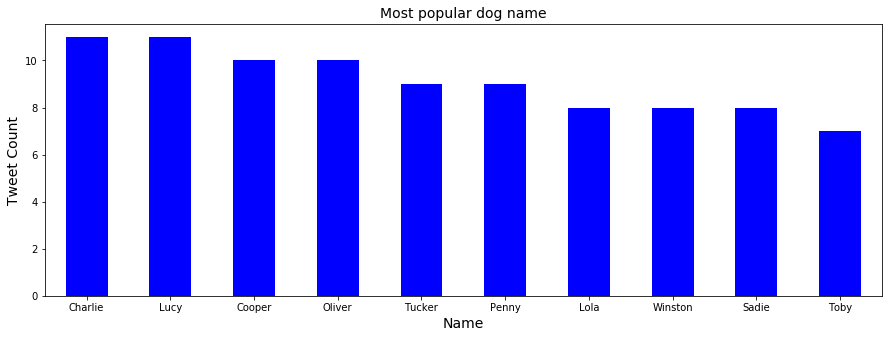

In [364]:
# bar chart for most tweet dog name
name_bar = df.name.value_counts()[1:11].plot.bar(color='blue')
name_bar.figure.set_size_inches(15, 5);
plt.title('Most popular dog name',fontsize=14)
plt.xlabel('Name',fontsize=14)
plt.ylabel('Tweet Count',fontsize=14)
plt.xticks(rotation=0)
plt.savefig('popular_dog_name.png', bbox_inches='tight')

> Charlie and Lucy are the most popular dog name.

### Question 2: Most twitter source are used for rating dog.

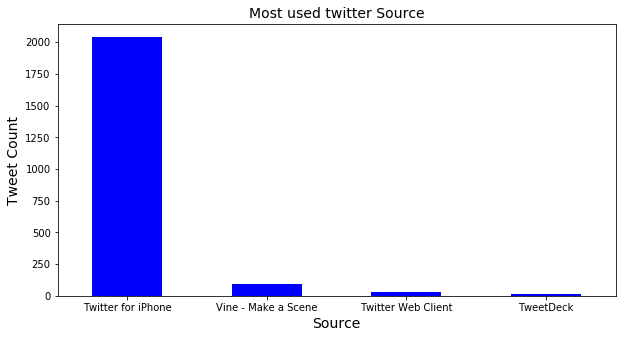

In [376]:
# bar chart for most twitter source used for rating dog.
name_bar = df.source.value_counts()[:10].plot.bar(color='blue')
name_bar.figure.set_size_inches(10, 5);
plt.title('Most used twitter Source',fontsize=14)
plt.xlabel('Source',fontsize=14)
plt.ylabel('Tweet Count',fontsize=14)
plt.xticks(rotation=0)
plt.savefig('popular_twitter_source.png', bbox_inches='tight')

> Twitter for iPhone is the most used source (about 2000 times)

### Question 3: Most popular dog type

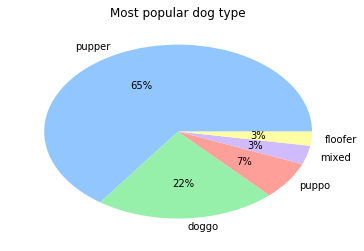

In [366]:
colors = sns.color_palette('pastel')[0:5]
dog_type_counts = df.dog_type.value_counts()
plt.pie(dog_type_counts,labels=dog_type_counts.index, colors = colors ,autopct='%.0f%%')
plt.title('Most popular dog type')
plt.savefig('popular_dog_type.png', bbox_inches='tight')

> pupper is the most popular dog type.(65%)

### Question 4: Relation between re-tweet and Favourite and Rating

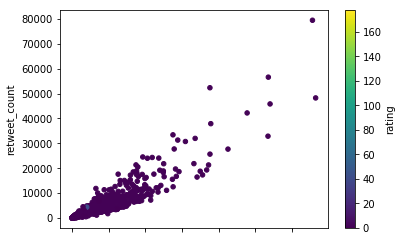

In [367]:
df['rating']= df.rating_numerator/df.rating_denominator
df.plot(kind='scatter',x='favorite_count',y='retweet_count', c='rating',cmap='viridis')

> There are outliers in rating column, so we can see relation between favourite and rating clearly.

In [368]:
# check outlier
df.rating.value_counts()

1.200000      504
1.000000      445
1.100000      432
1.300000      309
0.900000      157
0.800000       98
0.700000       53
1.400000       43
0.500000       36
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        7
0.000000        2
42.000000       2
1.700000        1
2.700000        1
18.200000       1
3.428571        1
177.600000      1
1.250000        1
7.500000        1
1.500000        1
66.600000       1
2.600000        1
Name: rating, dtype: int64

In [369]:
# remove outlier to see rating color better.
def remove_outlier(_df, col_name):
    q1 = _df[col_name].quantile(0.25)
    q3 = _df[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = _df.loc[(_df[col_name] > fence_low) & (_df[col_name] < fence_high)]
    return df_out

In [370]:
# remove outlier in rating column
df_scatter = remove_outlier(df,'rating')
df_scatter.rating.value_counts()

1.20    504
1.00    445
1.10    432
1.30    309
0.90    157
0.80     98
1.40     43
1.25      1
Name: rating, dtype: int64

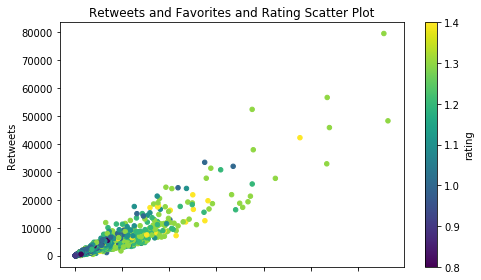

In [371]:
scatter = df_scatter.plot(kind='scatter',x='favorite_count',y='retweet_count', c='rating',cmap='viridis')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorites and Rating Scatter Plot')
scatter.figure.set_size_inches(7, 4);
plt.tight_layout()
plt.savefig('retweets_vs_favorites_vs_rating.png', bbox_inches='tight')

> Favourite and Re-tweet and Rating have positive correlation.

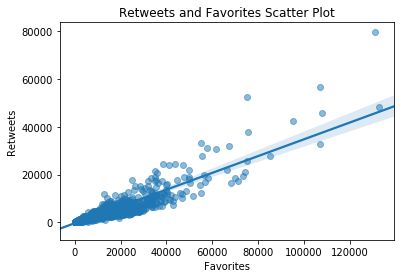

In [372]:
# scatter plot without rating and add regression line
sns.regplot(x=df.favorite_count, y=df.retweet_count, fit_reg=True,scatter_kws={'alpha':0.5});
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorites Scatter Plot')
plt.savefig('retweets_vs_favorites.png', bbox_inches='tight')

In [373]:
# correlation between favourite and retweet.
df.favorite_count.corr(df.retweet_count)

0.91184892659973937

In [374]:
# correlation between favourite and rating.
df_scatter.rating.corr(df_scatter.favorite_count)

0.46897610368929049

In [375]:
# correlation between retweet and rating.
df_scatter.rating.corr(df_scatter.retweet_count)

0.35550891499884008

### Insights:
1. Lucy , Charlie, Oliver, Cooper are the most used for dog name in these days.

2. Tweet for iPhone is the most used source.

3. pupper is the most dog type.

4. Favourite and Retweet have a strong positive correlation.